In [1]:
# referenced: https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733
# https://amueller.github.io/aml/01-ml-workflow/01-data-loading.html

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import os
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [3]:
df_flights = pd.read_csv(r'..\..\csvs\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df_flights.shape

(100998, 42)

### 0 - Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_flights, random_state=123)

In [6]:
print(df_train.shape)
print(df_test.shape)

(75748, 42)
(25250, 42)


In [7]:
with open(r'..\..\data\v2\df_train.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [61]:
with open(r'..\..\data\v2\df_test.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

### 1 - Investigate Null Values

In [9]:
df_train.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                 212
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                1174
dep_delay               1209
taxi_out                1236
wheels_off              1236
wheels_on               1262
taxi_in                 1262
crs_arr_time               0
arr_time                1235
arr_delay               1393
cancelled                  0
cancellation_code      74529
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time     1377
air_time                1404
flights                    0
distance                   0
carrier_delay          61364
weather_delay 

In [10]:
# percentage of nulls in each column

100*(df_train.isnull().sum()/len(df_train))

fl_date                  0.000000
mkt_unique_carrier       0.000000
branded_code_share       0.000000
mkt_carrier              0.000000
mkt_carrier_fl_num       0.000000
op_unique_carrier        0.000000
tail_num                 0.279875
op_carrier_fl_num        0.000000
origin_airport_id        0.000000
origin                   0.000000
origin_city_name         0.000000
dest_airport_id          0.000000
dest                     0.000000
dest_city_name           0.000000
crs_dep_time             0.000000
dep_time                 1.549876
dep_delay                1.596082
taxi_out                 1.631726
wheels_off               1.631726
wheels_on                1.666051
taxi_in                  1.666051
crs_arr_time             0.000000
arr_time                 1.630406
arr_delay                1.838992
cancelled                0.000000
cancellation_code       98.390717
diverted                 0.000000
dup                      0.000000
crs_elapsed_time         0.000000
actual_elapsed

In [11]:
# drop features with more than 80% missing values

df_train = df_train.dropna(thresh=df_train.shape[0]*0.8,axis=1)

In [12]:
df_train.shape

(75748, 32)

In [13]:
100*(df_train.isnull().sum()/len(df_train))

fl_date                0.000000
mkt_unique_carrier     0.000000
branded_code_share     0.000000
mkt_carrier            0.000000
mkt_carrier_fl_num     0.000000
op_unique_carrier      0.000000
tail_num               0.279875
op_carrier_fl_num      0.000000
origin_airport_id      0.000000
origin                 0.000000
origin_city_name       0.000000
dest_airport_id        0.000000
dest                   0.000000
dest_city_name         0.000000
crs_dep_time           0.000000
dep_time               1.549876
dep_delay              1.596082
taxi_out               1.631726
wheels_off             1.631726
wheels_on              1.666051
taxi_in                1.666051
crs_arr_time           0.000000
arr_time               1.630406
arr_delay              1.838992
cancelled              0.000000
diverted               0.000000
dup                    0.000000
crs_elapsed_time       0.000000
actual_elapsed_time    1.817870
air_time               1.853514
flights                0.000000
distance

In [14]:
# because remaining features with missing values make up such a small proportino of the data, drop observations with missing values

df_train.dropna(inplace=True)

In [15]:
sum(df_train.isnull().sum())

0

### 2 - Variable Identification

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74294 entries, 14731 to 15725
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              74294 non-null  object 
 1   mkt_unique_carrier   74294 non-null  object 
 2   branded_code_share   74294 non-null  object 
 3   mkt_carrier          74294 non-null  object 
 4   mkt_carrier_fl_num   74294 non-null  int64  
 5   op_unique_carrier    74294 non-null  object 
 6   tail_num             74294 non-null  object 
 7   op_carrier_fl_num    74294 non-null  int64  
 8   origin_airport_id    74294 non-null  int64  
 9   origin               74294 non-null  object 
 10  origin_city_name     74294 non-null  object 
 11  dest_airport_id      74294 non-null  int64  
 12  dest                 74294 non-null  object 
 13  dest_city_name       74294 non-null  object 
 14  crs_dep_time         74294 non-null  int64  
 15  dep_time             74294 non-n

In [17]:
df_train = df_train.reset_index(drop=True)

In [18]:
df_train.dtypes.value_counts()

object     11
int64      11
float64    10
dtype: int64

Categorical Variables:
- Nominal data = categorizes and labels variables
- Ordinal data = categorizes and labels variables + ranks categories in order

Quantitative Variables:
- Interval data = categorizes and labels variables + ranks categories in order + has known, equal intervals
- Ratio data = categorizes and labels variables + ranks categories in order + has known, equal intervals + has a true or meaningful zero (can't have less than 0)

In [19]:
#  0   fl_date              99030 non-null  object  quantitative - interval (datetime) 
#  1   mkt_unique_carrier   99030 non-null  object  categorical - nominal
#  2   branded_code_share   99030 non-null  object  categorical - nominal 
#  3   mkt_carrier          99030 non-null  object  categorical - nominal 
#  4   mkt_carrier_fl_num   99030 non-null  int64   categorical - nominal  
#  5   op_unique_carrier    99030 non-null  object  categorical - nominal 
#  6   tail_num             99030 non-null  object  categorical - nominal  
#  7   op_carrier_fl_num    99030 non-null  int64   categorical - nominal   
#  8   origin_airport_id    99030 non-null  int64   categorical - nominal   
#  9   origin               99030 non-null  object  categorical - nominal  
#  10  origin_city_name     99030 non-null  object  categorical - nominal  
#  11  dest_airport_id      99030 non-null  int64   categorical - nominal   
#  12  dest                 99030 non-null  object  categorical - nominal  
#  13  dest_city_name       99030 non-null  object  categorical - nominal  
#  14  crs_dep_time         99030 non-null  int64   quantitative - interval (datetime)  
#  15  dep_time             99030 non-null  float64 quantitative - interval (datetime)
#  16  dep_delay            99030 non-null  float64 quantitative - ratio     
#  17  taxi_out             99030 non-null  float64 quantitative - ratio
#  18  wheels_off           99030 non-null  float64 quantitative - interval (datetime) 
#  19  wheels_on            99030 non-null  float64 quantitative - interval (datetime)
#  20  taxi_in              99030 non-null  float64 quantitative - ratio
#  21  crs_arr_time         99030 non-null  int64   quantitative - interval (datetime)     
#  22  arr_time             99030 non-null  float64 quantitative - interval (datetime)   
#  23  arr_delay            99030 non-null  float64 quantitative - ratio 
#  24  cancelled            99030 non-null  int64   categorical - nominal (boolean)     
#  25  diverted             99030 non-null  int64   categorical - nominal (boolean)     
#  26  dup                  99030 non-null  object  categorical - nominal   
#  27  crs_elapsed_time     99030 non-null  int64   quantitative - ratio (scheduled elapsed time of flight, in minutes)     
#  28  actual_elapsed_time  99030 non-null  float64 quantitative - ratio (actual elapsed time of flight, in minutes)
#  29  air_time             99030 non-null  float64 quantitative - ratio 
#  30  flights              99030 non-null  int64   quantitative - ratio     
#  31  distance             99030 non-null  int64   quantitative - ratio 

In [20]:
# fix datatypes

df_train['fl_date'] = pd.to_datetime(df_train['fl_date'])

df_train['crs_dep_time'] = df_train['crs_dep_time'].astype(int)
df_train['crs_dep_time'] = pd.to_datetime(df_train['crs_dep_time'], format = '%H%M', errors = 'coerce')

df_train['dep_time'] = df_train['dep_time'].astype(int)
df_train['dep_time'] = pd.to_datetime(df_train['dep_time'], format = '%H%M', errors = 'coerce')

df_train['crs_arr_time'] = df_train['crs_arr_time'].astype(int)
df_train['crs_arr_time'] = pd.to_datetime(df_train['crs_arr_time'], format = '%H%M', errors = 'coerce')

df_train['arr_time'] = df_train['arr_time'].astype(int)
df_train['arr_time'] = pd.to_datetime(df_train['arr_time'], format = '%H%M', errors = 'coerce')

df_train['wheels_off'] = df_train['wheels_off'].astype(int)
df_train['wheels_off'] = pd.to_datetime(df_train['wheels_off'], format = '%H%M', errors = 'coerce')

df_train['wheels_on'] = df_train['wheels_on'].astype(int)
df_train['wheels_on'] = pd.to_datetime(df_train['wheels_on'], format = '%H%M', errors = 'coerce')

df_train['mkt_carrier_fl_num'] = df_train['mkt_carrier_fl_num'].astype(str)
df_train['op_carrier_fl_num'] = df_train['op_carrier_fl_num'].astype(str)
df_train['origin_airport_id'] = df_train['origin_airport_id'].astype(str)
df_train['dest_airport_id'] = df_train['dest_airport_id'].astype(str)


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74294 entries, 0 to 74293
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fl_date              74294 non-null  datetime64[ns]
 1   mkt_unique_carrier   74294 non-null  object        
 2   branded_code_share   74294 non-null  object        
 3   mkt_carrier          74294 non-null  object        
 4   mkt_carrier_fl_num   74294 non-null  object        
 5   op_unique_carrier    74294 non-null  object        
 6   tail_num             74294 non-null  object        
 7   op_carrier_fl_num    74294 non-null  object        
 8   origin_airport_id    74294 non-null  object        
 9   origin               74294 non-null  object        
 10  origin_city_name     74294 non-null  object        
 11  dest_airport_id      74294 non-null  object        
 12  dest                 74294 non-null  object        
 13  dest_city_name       74294 non-

In [22]:
# create subset of flights dataframe with quantitative ratio data only

quant_ratio_feats = df_train.dtypes[(df_train.dtypes == 'float64') | (df_train.dtypes == 'int64')].index.tolist()
quant_ratio_df = df_train[quant_ratio_feats]
quant_ratio_df.drop(columns=['cancelled','diverted'],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28912\152665121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_ratio_df.drop(columns=['cancelled','diverted'],inplace=True)


In [23]:
quant_ratio_df.head()

,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,-4.0,17.0,25.0,-3.0,90,91.0,49.0,1,212
1,-9.0,12.0,12.0,-7.0,49,51.0,27.0,1,84
2,0.0,11.0,3.0,-20.0,107,87.0,73.0,1,515
3,-20.0,10.0,2.0,-28.0,39,31.0,19.0,1,68
4,-3.0,7.0,5.0,-24.0,155,134.0,122.0,1,990


In [24]:
# create subset of flights dataframe with quantitative interval data only

quant_interval_feats = df_train.dtypes[(df_train.dtypes == 'datetime64[ns]') | (df_train.dtypes == 'timedelta64[ns]')].index.tolist()
quant_interval_df = df_train[quant_interval_feats]

In [25]:
# create subset of flights dataframe with all quantitative data

numeric_df = pd.concat([quant_ratio_df, quant_interval_df], axis=1)

In [26]:
# create # create subset of flights dataframe with all categorical data

cat_nom_feats = df_train.drop(columns=list(numeric_df.columns))
cat_nom_feats.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,cancelled,diverted,dup
0,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,"Washington, DC",11618,EWR,"Newark, NJ",0,0,N
1,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,"Harrisburg, PA",14100,PHL,"Philadelphia, PA",0,0,N
2,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,"Philadelphia, PA",11996,GSP,"Greer, SC",0,0,N
3,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,"Charlotte Amalie, VI",14843,SJU,"San Juan, PR",0,0,N
4,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",0,0,N


### 3 - Univariate Analysis

##### Quantitative Variables

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

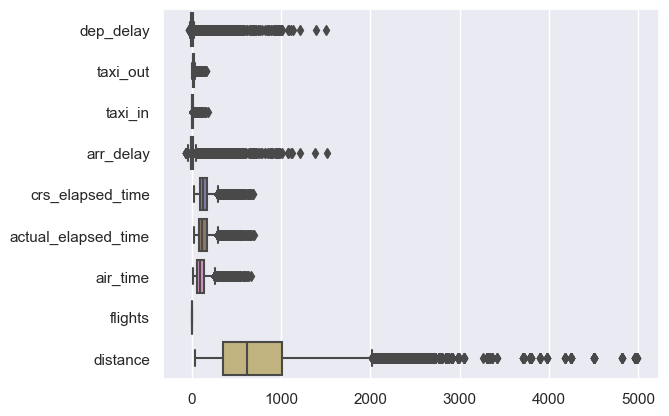

In [27]:
sns.boxplot(data=numeric_df, orient='h')

For continuous variables: We can build histograms and boxplots for each continuous variable independently. These figures give us an understanding about the variables’ central tendencies and spread.

In [28]:
quant_ratio_df.describe()

,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,74294.000000,74294.000000,74294.000000,74294.000000,74294.000000,74294.000000,74294.000000,74294.0,74294.000000
mean,10.543611,17.481344,7.686300,5.385213,138.959014,133.800616,108.632972,1.0,776.752564
std,45.855688,10.091073,6.150444,48.179896,71.719720,71.649505,69.645820,0.0,586.860272
min,-35.000000,0.000000,0.000000,-68.000000,22.000000,20.000000,9.000000,1.0,31.000000
25%,-6.000000,11.000000,4.000000,-15.000000,88.000000,82.000000,58.000000,1.0,347.000000
50%,-2.000000,15.000000,6.000000,-6.000000,120.000000,116.000000,90.000000,1.0,612.000000
75%,7.000000,20.000000,9.000000,8.000000,169.000000,164.000000,138.000000,1.0,1014.000000
max,1503.000000,162.000000,182.000000,1516.000000,679.000000,693.000000,660.000000,1.0,4983.000000


In [29]:
# taxi_out and taxi_in minimum values of 0 are likely null values, since taxi time cannot actually be zero

In [30]:
df_train[df_train['taxi_in']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
21536,2019-11-16,HA,HA_CODESHARE,HA,602,EM,N801HC,602,12173,HNL,...,1900-01-01 07:21:00,-5.0,0,0,N,31,28.0,18.0,1,54
35040,2019-07-02,HA,HA_CODESHARE,HA,634,EM,N804HC,634,12173,HNL,...,1900-01-01 11:20:00,-5.0,0,0,N,34,31.0,21.0,1,72
39333,2018-11-11,HA,HA_CODESHARE,HA,614,EM,N804HC,614,12173,HNL,...,1900-01-01 15:02:00,-12.0,0,0,N,30,29.0,19.0,1,54
57915,2018-11-09,HA,HA_CODESHARE,HA,623,EM,N805HC,623,13034,LNY,...,1900-01-01 20:03:00,-9.0,0,0,N,32,27.0,25.0,1,72


In [31]:
df_train[df_train['taxi_out']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
46719,2018-11-09,HA,HA_CODESHARE,HA,619,EM,N805HC,619,13347,MKK,...,1900-01-01 16:09:00,1.0,0,0,N,28,23.0,19.0,1,54


In [32]:
# very few nulls - so just drop 

In [33]:
df_train = df_train.replace({"taxi_out" : {0: np.nan},"taxi_in" : {0: np.nan}})

In [34]:
df_train.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time            15
dep_time                72
dep_delay                0
taxi_out                 1
wheels_off             111
wheels_on              330
taxi_in                  4
crs_arr_time           198
arr_time               371
arr_delay                0
cancelled                0
diverted                 0
dup                      0
crs_elapsed_time         0
actual_elapsed_time      0
air_time                 0
flights                  0
distance                 0
dtype: int64

In [35]:
df_train.dropna(inplace=True)
df_train = df_train.reset_index(drop=True)

In [36]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

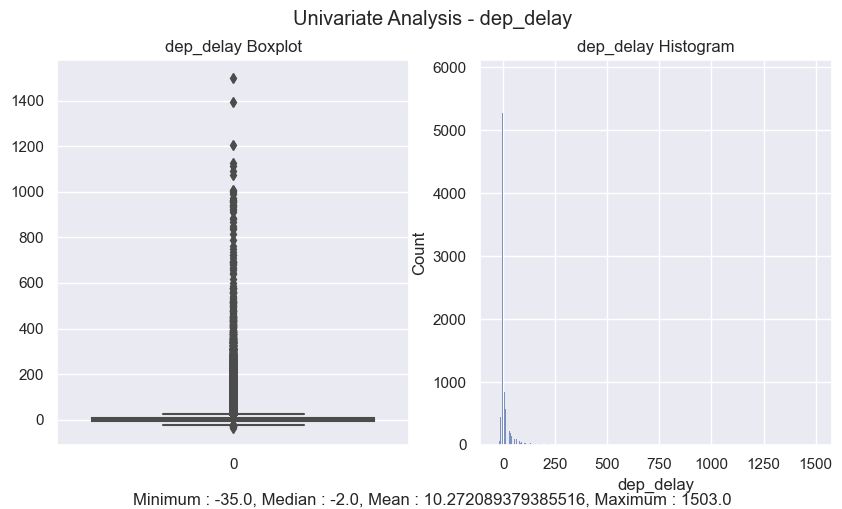

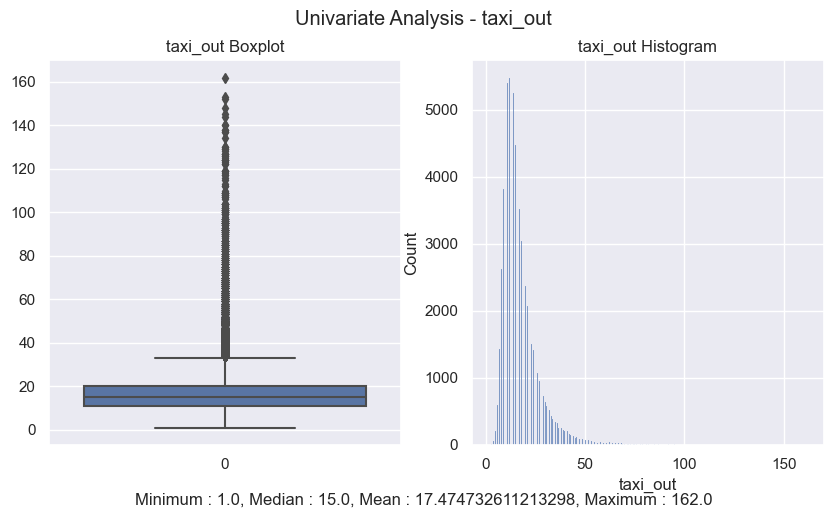

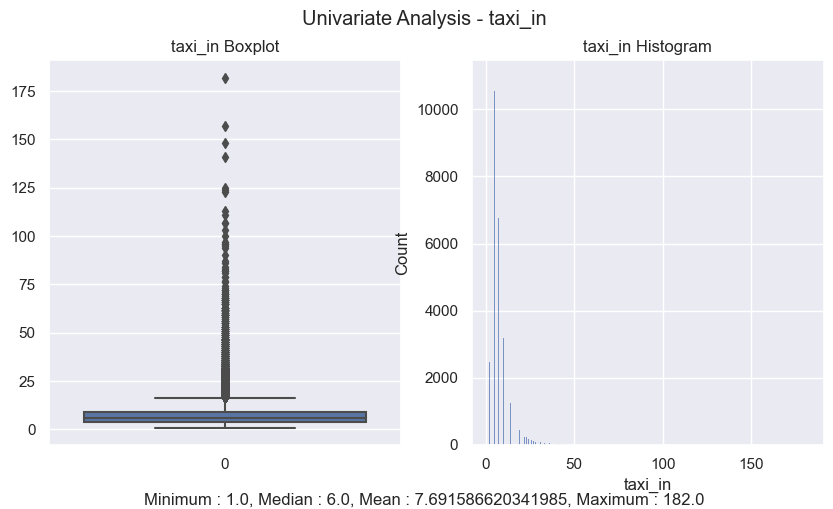

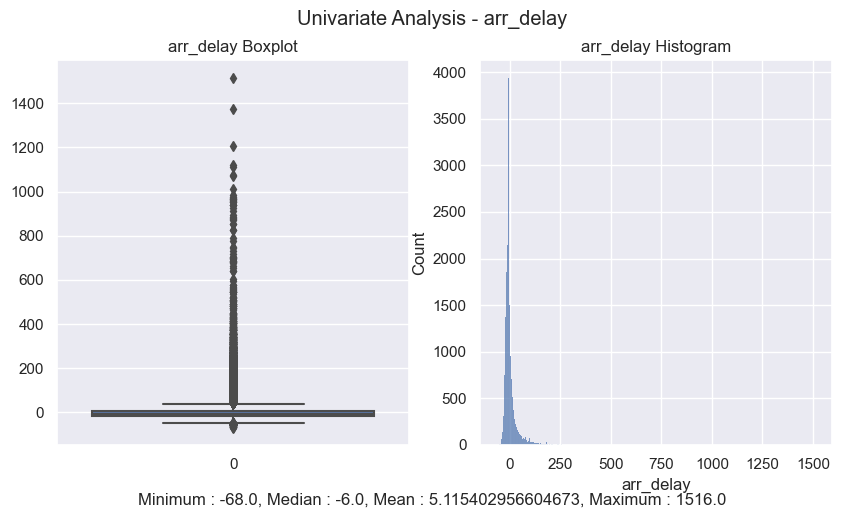

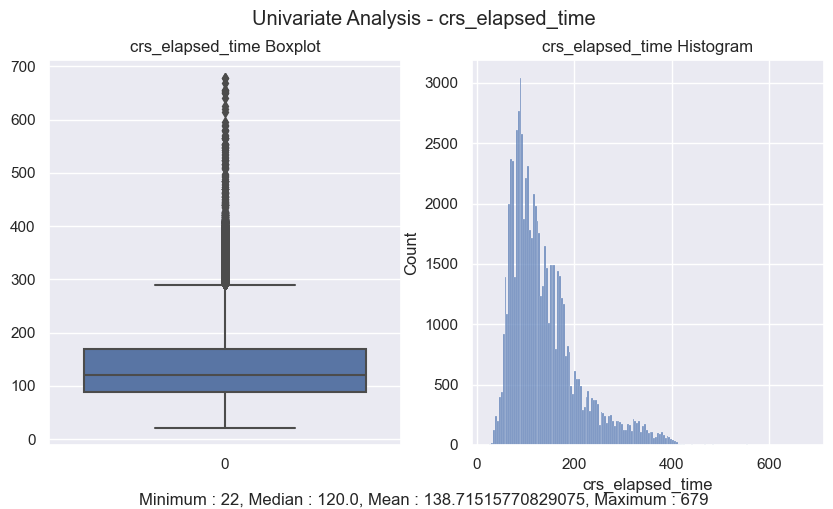

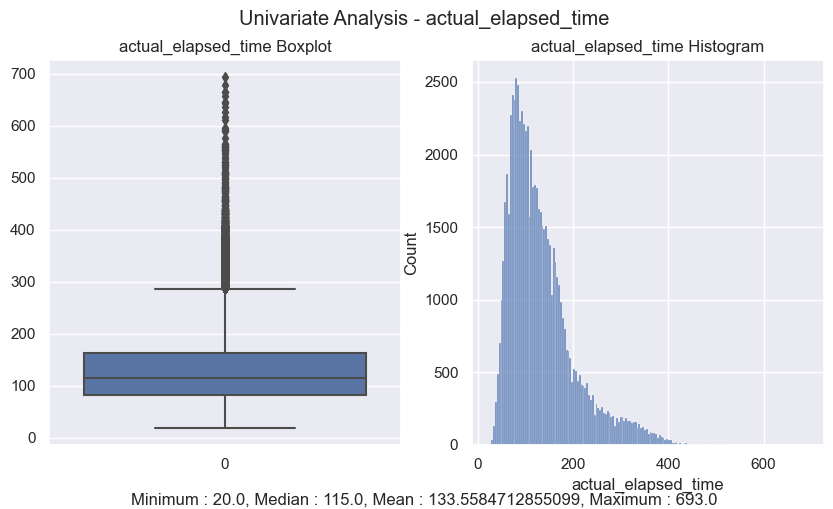

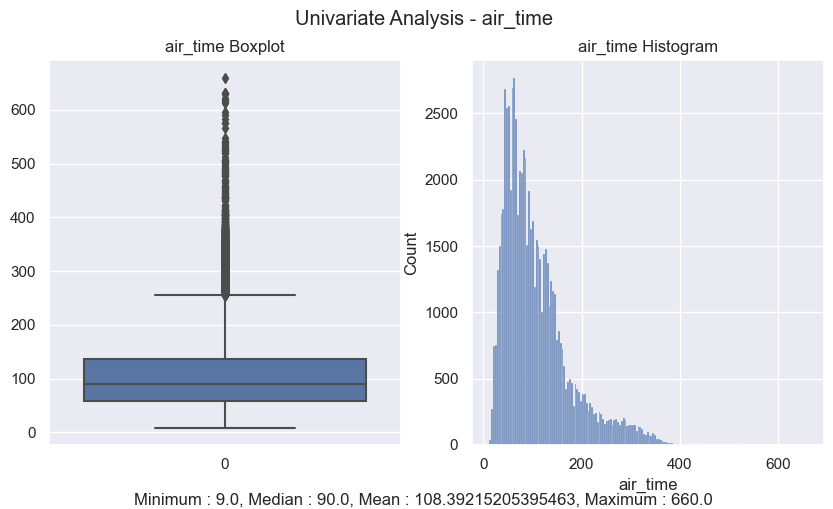

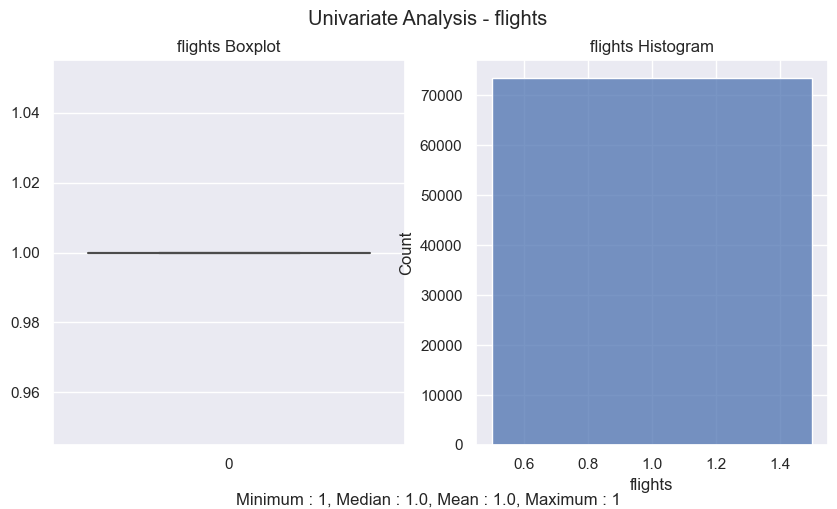

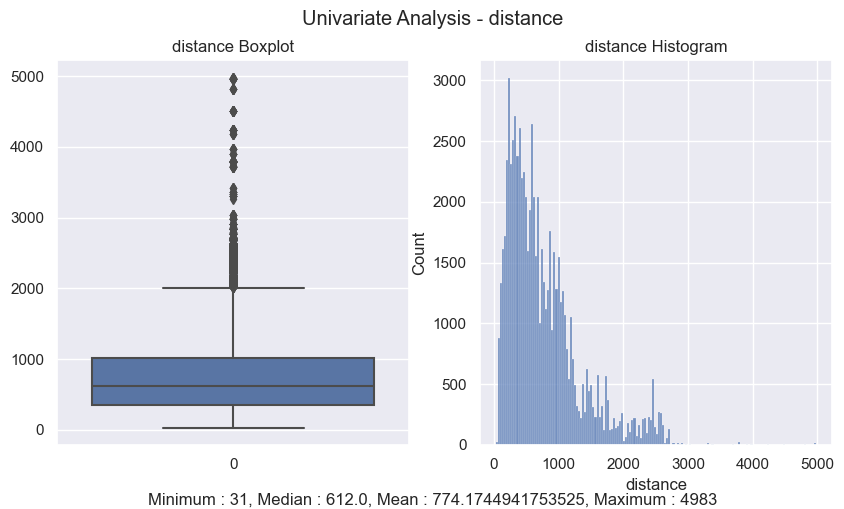

In [37]:
for feat in quant_ratio_df:
    uni_analyis_continuous(df_train, feature=feat, feature_title=feat)

##### Check for Outliers

In [38]:
# check if the outliers seem like mistakes, or if they could be possible. If mistakes, then drop, otherwise keep.

In [39]:
quant_ratio_df.columns

Index(['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

In [40]:
def detect_outliers(data):
    from scipy import stats
    import numpy as np

    for feature in data.columns:
        #Finding Z Score on Column
        stats.zscore(data[feature])

        # Turning Absolute
        np.abs(stats.zscore(data[feature]))

        # view the outliers
        outliers = data[feature][(np.abs(stats.zscore(data[feature])) > 3)]

        print(f'Most extreme outlier for {feature} is {outliers.max()}')

In [41]:
detect_outliers(quant_ratio_df)

Most extreme outlier for dep_delay is 1503.0
Most extreme outlier for taxi_out is 162.0
Most extreme outlier for taxi_in is 182.0
Most extreme outlier for arr_delay is 1516.0
Most extreme outlier for crs_elapsed_time is 679
Most extreme outlier for actual_elapsed_time is 693.0
Most extreme outlier for air_time is 660.0
Most extreme outlier for flights is nan
Most extreme outlier for distance is 4983


In [42]:
# max outliers don't seem impossible, so keep

##### Categorical Variables

For categorical variables: Create a count plot visualization that shows the frequencies in each category.

In [43]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 10, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

In [44]:
cat_nom_feats.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'cancelled', 'diverted',
       'dup'],
      dtype='object')

In [45]:
for cat in cat_nom_feats.columns:
    print(f'{cat} unique values: {df_flights[cat].nunique()}')

mkt_unique_carrier unique values: 10
branded_code_share unique values: 15
mkt_carrier unique values: 10
mkt_carrier_fl_num unique values: 6771
op_unique_carrier unique values: 27
tail_num unique values: 6153
op_carrier_fl_num unique values: 6773
origin_airport_id unique values: 369
origin unique values: 369
origin_city_name unique values: 362
dest_airport_id unique values: 370
dest unique values: 370
dest_city_name unique values: 363
cancelled unique values: 2
diverted unique values: 2
dup unique values: 1


In [46]:
df_flights[['origin_airport_id',
'origin',
'origin_city_name',
'dest_airport_id',
'dest',
'dest_city_name']].head()

,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name
0,12889,LAS,"Las Vegas, NV",13851,OKC,"Oklahoma City, OK"
1,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
2,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
3,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"
4,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"


In [47]:
df_flights[['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier']].head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier
0,WN,WN,WN,5431,WN
1,WN,WN,WN,989,WN
2,WN,WN,WN,1664,WN
3,WN,WN,WN,1106,WN
4,WN,WN,WN,1559,WN


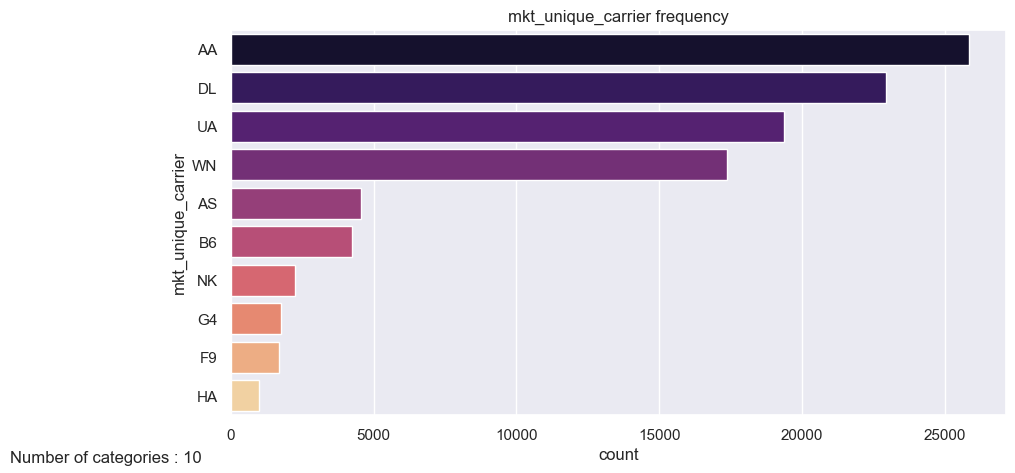

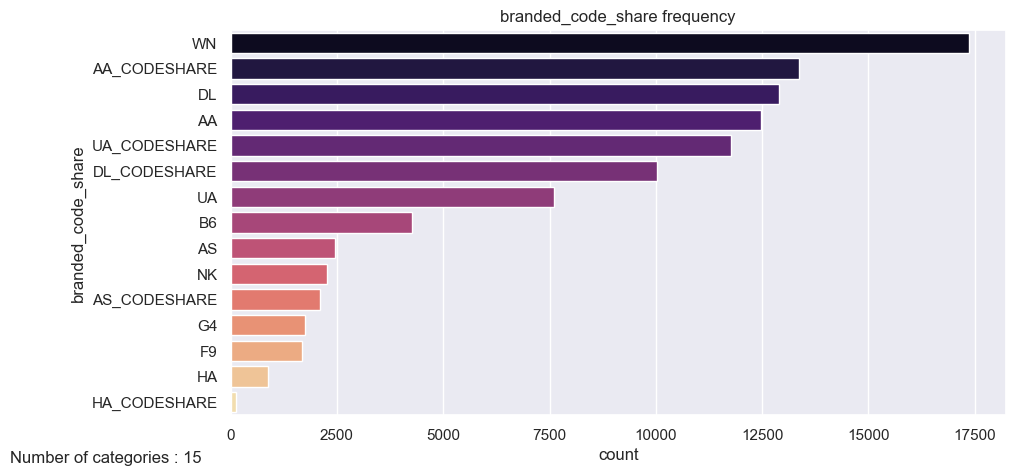

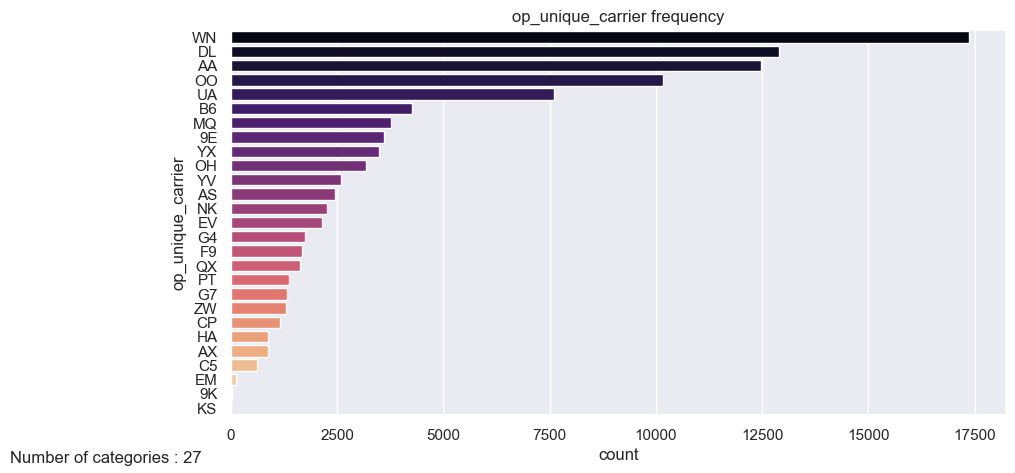

In [48]:
for feat in ['mkt_unique_carrier', 'branded_code_share', 'op_unique_carrier']:
    uni_analyis_categorical(df_flights, feature=feat)

##### Explore the Target Variable

In [49]:
# descriptive statistics

df_train['arr_delay'].describe()

count    73395.000000
mean         5.115403
std         47.946830
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          7.000000
max       1516.000000
Name: arr_delay, dtype: float64

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

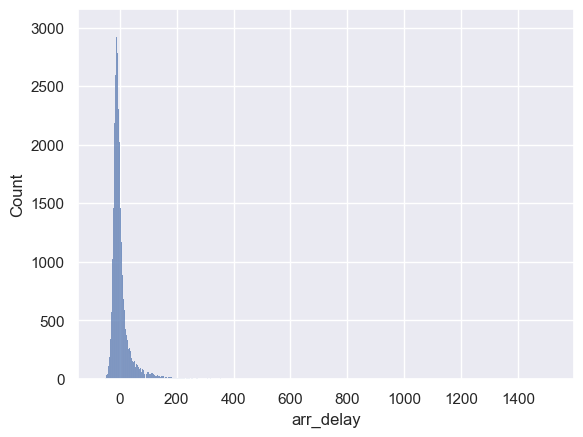

In [50]:
# histogram

sns.histplot(df_flights['arr_delay'])

### 4 - Bi-Variate Analysis

In [51]:
quant_ratio_df.columns

Index(['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

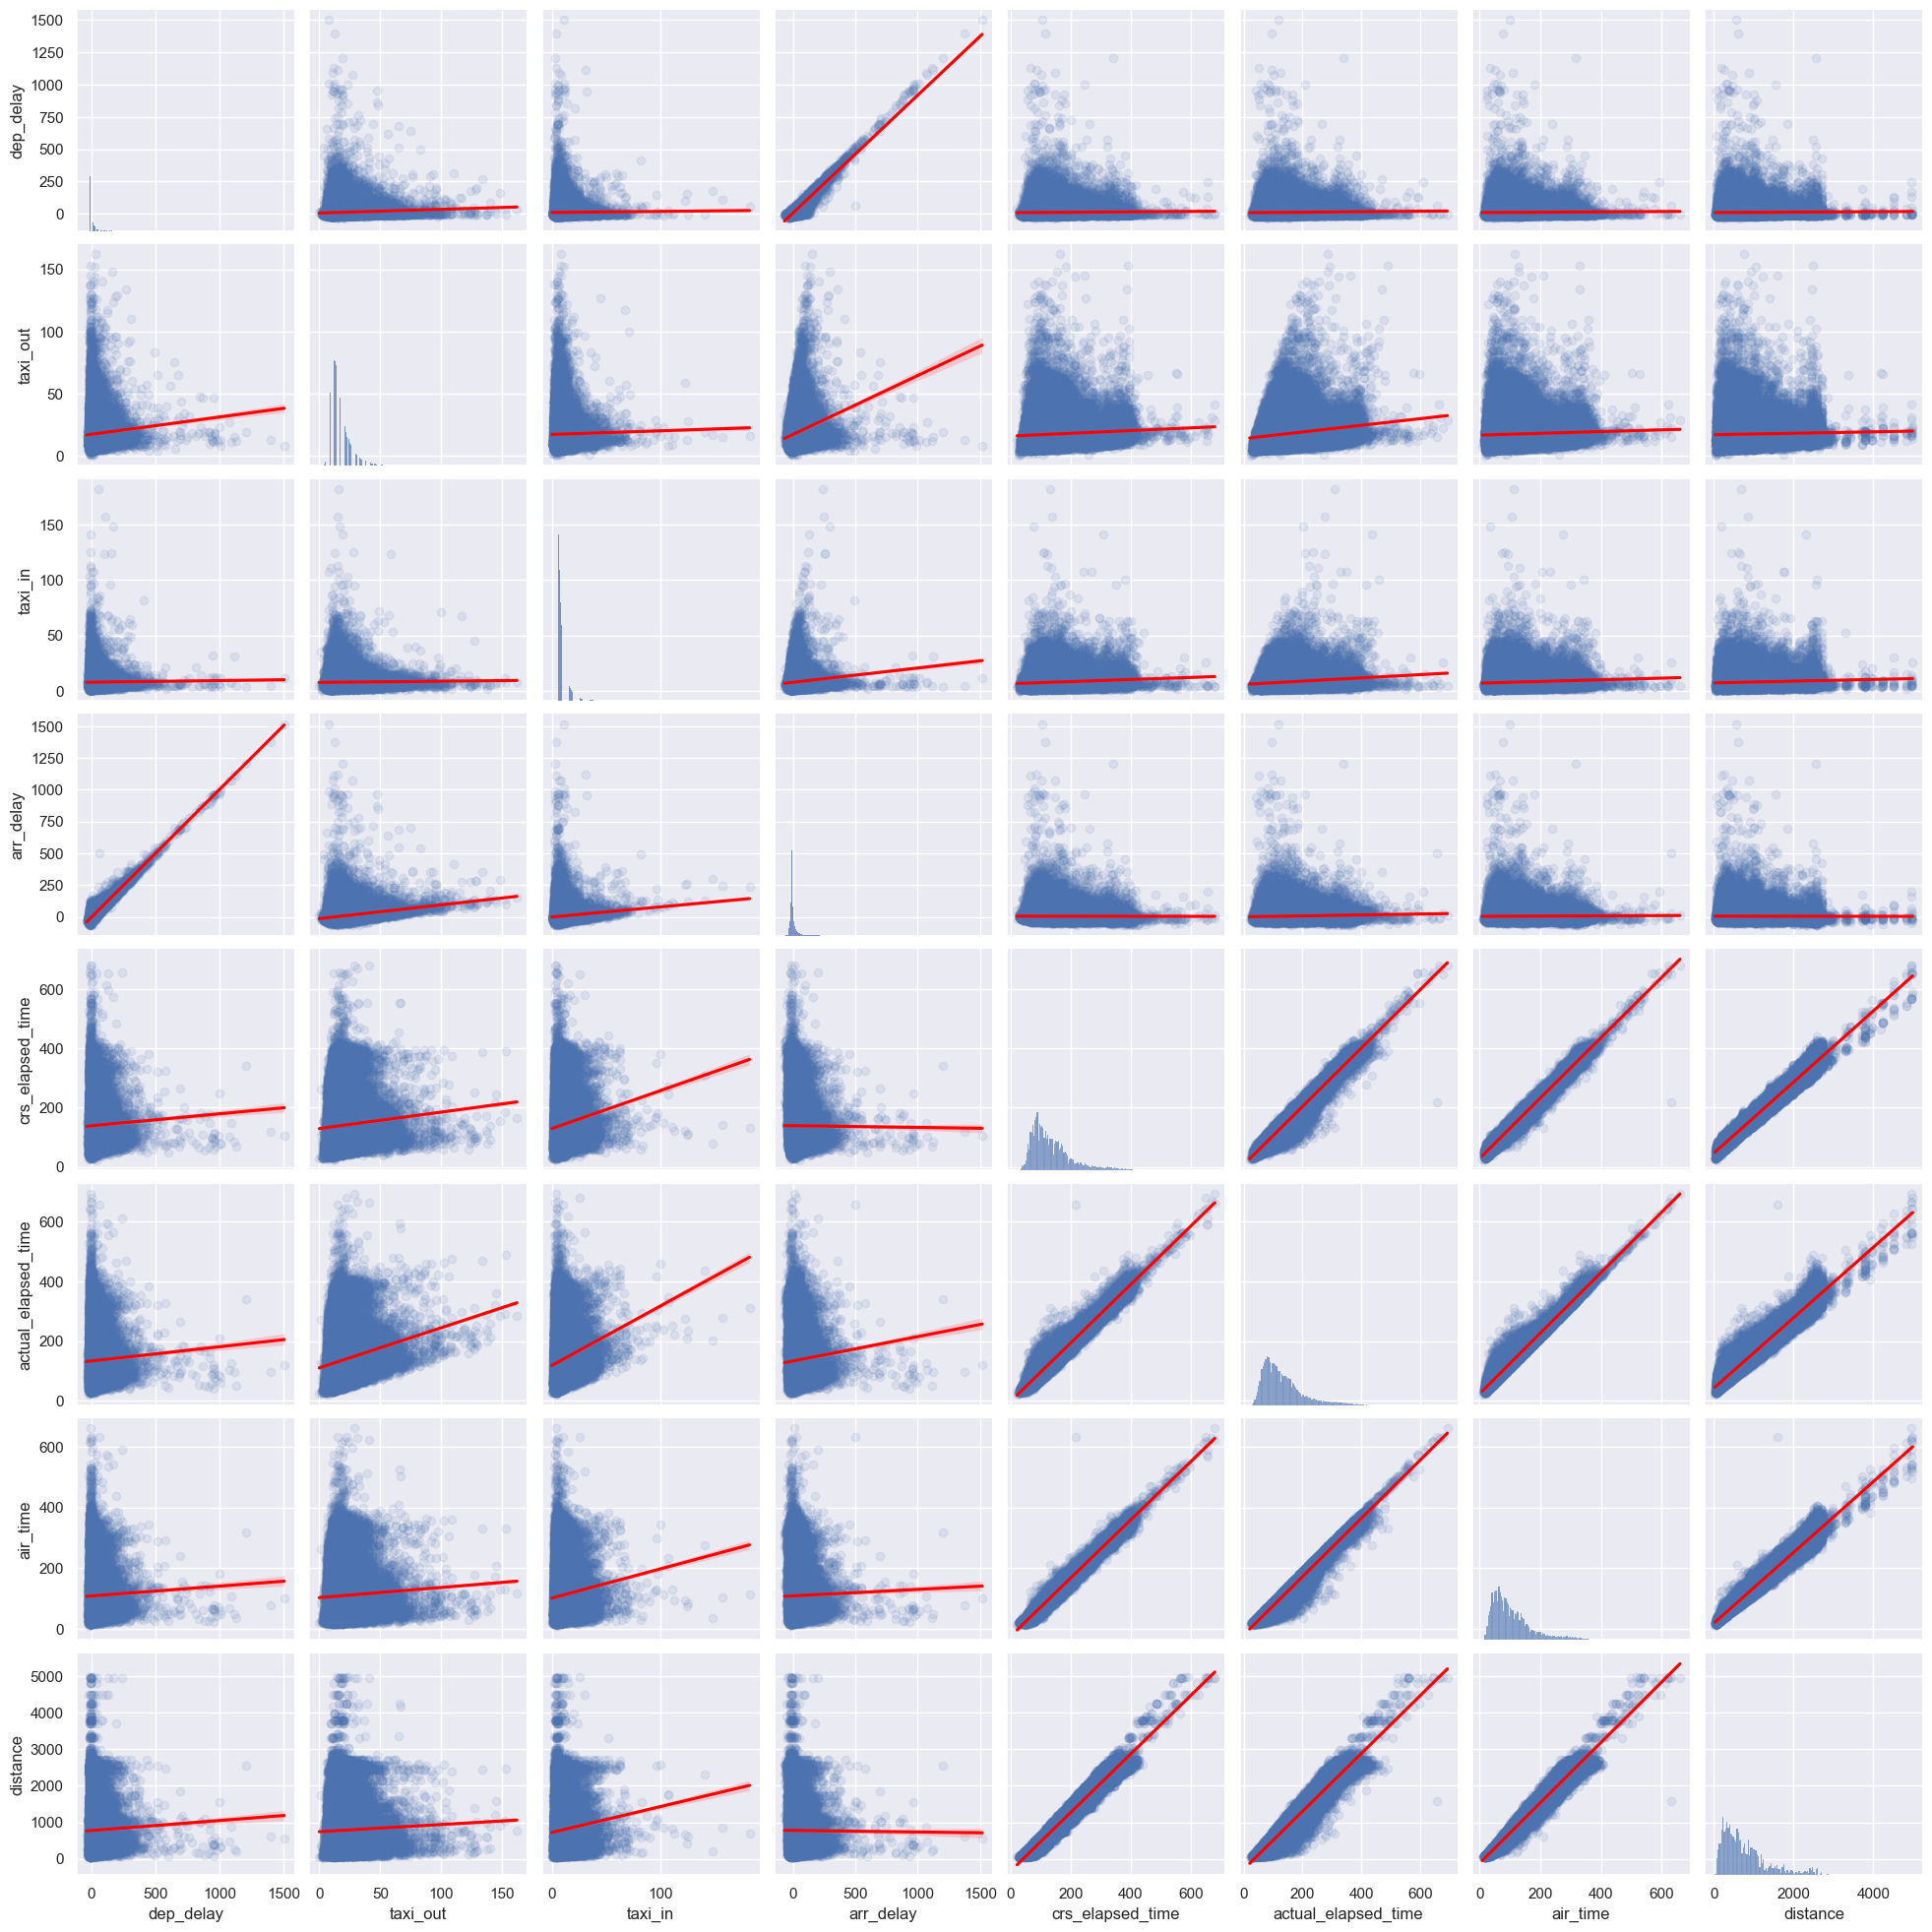

In [52]:
sns.pairplot(quant_ratio_df.drop(columns='flights'), kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

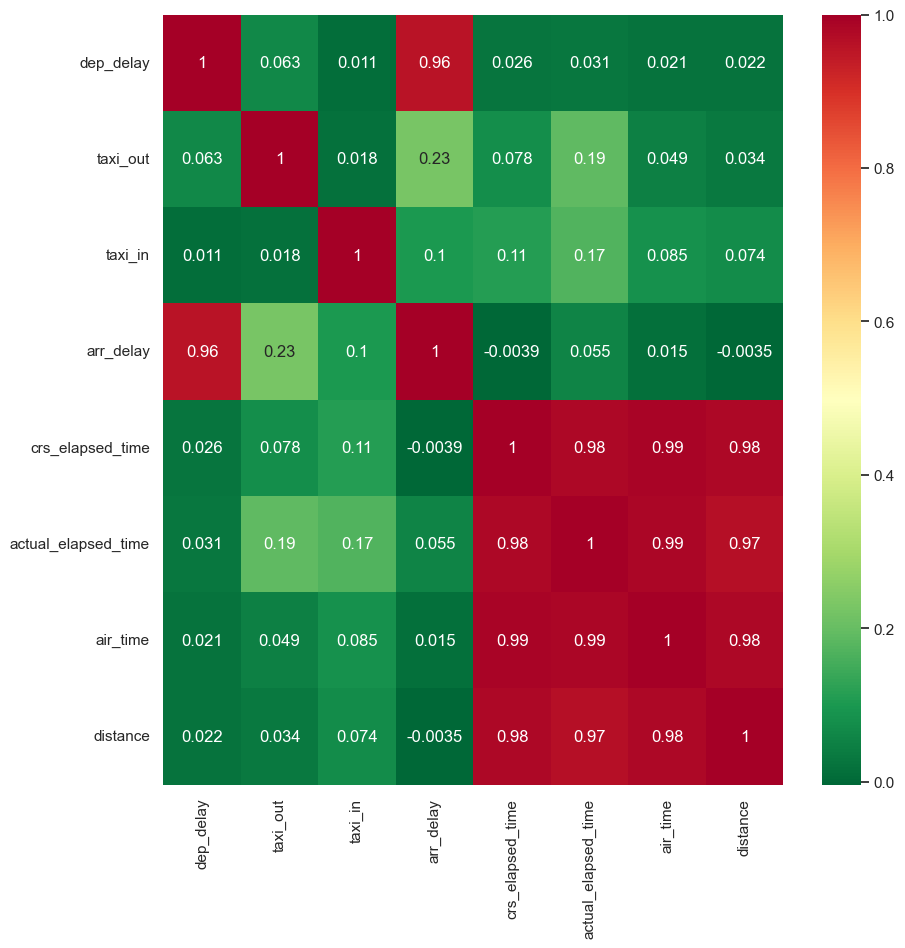

In [53]:
corrmat = quant_ratio_df.drop(columns='flights').corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

In [54]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,1900-01-01 18:37:00,-3.0,0,0,N,90,91.0,49.0,1,212
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,1900-01-01 11:23:00,-7.0,0,0,N,49,51.0,27.0,1,84
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,1900-01-01 19:22:00,-20.0,0,0,N,107,87.0,73.0,1,515
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,1900-01-01 09:51:00,-28.0,0,0,N,39,31.0,19.0,1,68
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,1900-01-01 09:01:00,-24.0,0,0,N,155,134.0,122.0,1,990


### 5 - Save Cleaned Training Set

In [55]:
with open(r'..\..\data\v2\df_train_step1output.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

### 6 - Clean and Save Test Set (same steps as performed on Training Set)

In [62]:
with open(r'..\..\data\v2\df_test.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [63]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
35321,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,503,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN,NaN
86462,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18109,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58491,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53858,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,265,6.0,0.0,0.0,0.0,63.0,NaN,NaN,NaN,NaN


In [64]:
# drop features with more than 80% missing values

df_test = df_test.dropna(thresh=df_test.shape[0]*0.8,axis=1)

In [65]:
# drop rows with null values

df_test.dropna(inplace=True)

In [66]:
# drop rows with null taxi values

df_test = df_test.replace({"taxi_out" : {0: np.nan},"taxi_in" : {0: np.nan}})

In [67]:
df_test = df_test.reset_index(drop=True)

In [68]:
# fix datatypes

df_test['fl_date'] = pd.to_datetime(df_test['fl_date'])

df_test['crs_dep_time'] = df_test['crs_dep_time'].astype(int)
df_test['crs_dep_time'] = pd.to_datetime(df_test['crs_dep_time'], format = '%H%M', errors = 'coerce')

df_test['dep_time'] = df_test['dep_time'].astype(int)
df_test['dep_time'] = pd.to_datetime(df_test['dep_time'], format = '%H%M', errors = 'coerce')

df_test['crs_arr_time'] = df_test['crs_arr_time'].astype(int)
df_test['crs_arr_time'] = pd.to_datetime(df_test['crs_arr_time'], format = '%H%M', errors = 'coerce')

df_test['arr_time'] = df_test['arr_time'].astype(int)
df_test['arr_time'] = pd.to_datetime(df_test['arr_time'], format = '%H%M', errors = 'coerce')

df_test['wheels_off'] = df_test['wheels_off'].astype(int)
df_test['wheels_off'] = pd.to_datetime(df_test['wheels_off'], format = '%H%M', errors = 'coerce')

df_test['wheels_on'] = df_test['wheels_on'].astype(int)
df_test['wheels_on'] = pd.to_datetime(df_test['wheels_on'], format = '%H%M', errors = 'coerce')

df_test['mkt_carrier_fl_num'] = df_test['mkt_carrier_fl_num'].astype(str)
df_test['op_carrier_fl_num'] = df_test['op_carrier_fl_num'].astype(str)
df_test['origin_airport_id'] = df_test['origin_airport_id'].astype(str)
df_test['dest_airport_id'] = df_test['dest_airport_id'].astype(str)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24736 entries, 0 to 24735
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fl_date              24736 non-null  datetime64[ns]
 1   mkt_unique_carrier   24736 non-null  object        
 2   branded_code_share   24736 non-null  object        
 3   mkt_carrier          24736 non-null  object        
 4   mkt_carrier_fl_num   24736 non-null  object        
 5   op_unique_carrier    24736 non-null  object        
 6   tail_num             24736 non-null  object        
 7   op_carrier_fl_num    24736 non-null  object        
 8   origin_airport_id    24736 non-null  object        
 9   origin               24736 non-null  object        
 10  origin_city_name     24736 non-null  object        
 11  dest_airport_id      24736 non-null  object        
 12  dest                 24736 non-null  object        
 13  dest_city_name       24736 non-

In [70]:
# drop datetime values that didn't convert

df_test.dropna(inplace=True)
df_test = df_test.reset_index(drop=True)

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24444 entries, 0 to 24443
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fl_date              24444 non-null  datetime64[ns]
 1   mkt_unique_carrier   24444 non-null  object        
 2   branded_code_share   24444 non-null  object        
 3   mkt_carrier          24444 non-null  object        
 4   mkt_carrier_fl_num   24444 non-null  object        
 5   op_unique_carrier    24444 non-null  object        
 6   tail_num             24444 non-null  object        
 7   op_carrier_fl_num    24444 non-null  object        
 8   origin_airport_id    24444 non-null  object        
 9   origin               24444 non-null  object        
 10  origin_city_name     24444 non-null  object        
 11  dest_airport_id      24444 non-null  object        
 12  dest                 24444 non-null  object        
 13  dest_city_name       24444 non-

In [72]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,1900-01-01 19:12:00,17.0,0,0,N,105,121.0,81.0,1,503
1,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,1900-01-01 23:21:00,-25.0,0,0,N,150,133.0,110.0,1,821
2,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,1900-01-01 07:30:00,-10.0,0,0,N,70,67.0,55.0,1,358
3,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,1900-01-01 10:37:00,-3.0,0,0,N,155,155.0,137.0,1,1033
4,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,1900-01-01 21:42:00,69.0,0,0,N,82,82.0,59.0,1,265


In [73]:
with open(r'..\..\data\v2\df_test_step1output.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)